## Topics to be covered

1. [Matplotlib](##1.-Matplotlib)
2. [Normalization](##2.-Data-Normalization)
    - [min-max scaling](###-Using-The-min-max-feature-scaling)
    - [z score](###-Using-The-z-score-method)
3. [Pandas](##3.-Pandas)
4. [Introduction to Exploratory Data Analysis](##4.-Introduction-to-Exploratory-Data-Analysis)

## 1. Matplotlib

### Example of simple plotting

In [9]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np

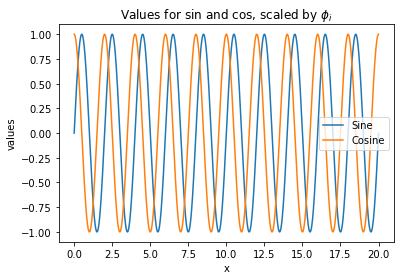

In [1]:
x_values = np.arange(0,20,0.001)


y1_values = np.sin(x_values * np.pi)
y2_values = np.cos(x_values * np.pi)

plt.plot(x_values, y1_values, label='Sine')
plt.plot(x_values, y2_values, label='Cosine')

plt.legend()
plt.xlabel('x')
plt.ylabel('values')
plt.title('Values for sin and cos, scaled by $\phi_i$')
plt.show()

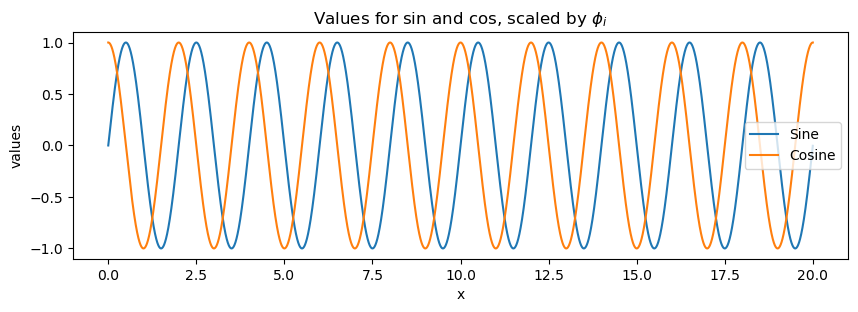

In [2]:
#You can adjust figure size for aspect ratio then DPI for density of pixels.
#These combined give you resolution of the image

plt.figure(figsize=(10,3), dpi=100) 
y1_values = np.sin(x_values * np.pi)
y2_values = np.cos(x_values * np.pi)

plt.plot(x_values, y1_values, label='Sine')
plt.plot(x_values, y2_values, label='Cosine')

plt.legend()
plt.xlabel('x')
plt.ylabel('values')
plt.title('Values for sin and cos, scaled by $\phi_i$')
plt.show()

#plt.savefig('xyz.jpg')
plt.show()

## Subplots

In [10]:
def subplot_example(index, x_values):
    
    y1_values = np.sin(x_values * np.pi)
    y2_values = np.cos(x_values * np.pi)

    plt.plot(x_values, y1_values, c='r', label='Sine')
    plt.scatter(x_values, y2_values, s=4, label='Cosine')

    plt.legend()
    plt.xlabel('x')
    plt.ylabel('values')
    plt.title(f'Values for sin and cos (Subplot #{index})')

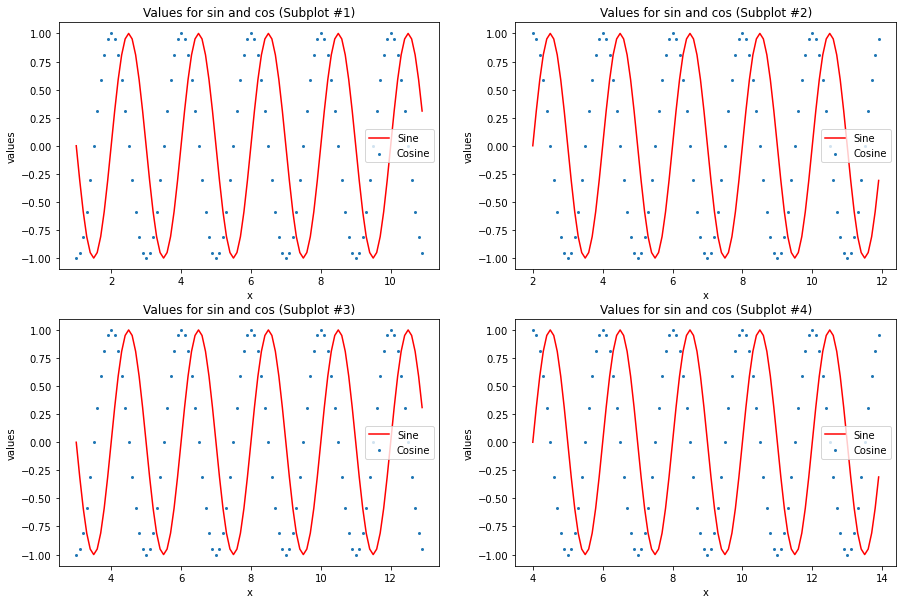

In [11]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
x1_values = np.arange(1, 11, 0.1)
subplot_example(1, x1_values)

plt.subplot(2,2,2)
x2_values = np.arange(2, 12, 0.1)
subplot_example(2, x2_values)

plt.subplot(2,2,3)
x3_values = np.arange(3, 13, 0.1)
subplot_example(3, x3_values)

plt.subplot(2,2,4)
x4_values = np.arange(4, 14, 0.1)
subplot_example(4, x4_values)

## Show image

When showing images, we have to tell numpy the range of pixel values. Typically pixel values are either 0-1 or 0-255

In [1]:
import matplotlib.pyplot as plt
import numpy as np

(256, 256)


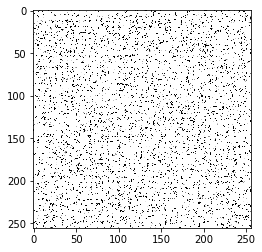

In [3]:
img_arr = np.random.random((256, 256))# 0 -> 1
print(img_arr.shape)

plt.imshow(img_arr, cmap='gray', vmin=0.2, vmax=0.25)
plt.show()

(256, 256, 3)


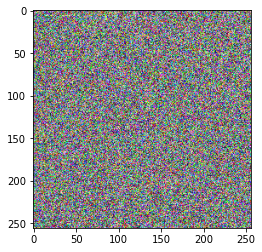

In [5]:
img_arr = np.random.random((256, 256, 3))# R, C, (RGB)
print(img_arr.shape)

plt.imshow(img_arr, vmin=0, vmax=1)
plt.show()

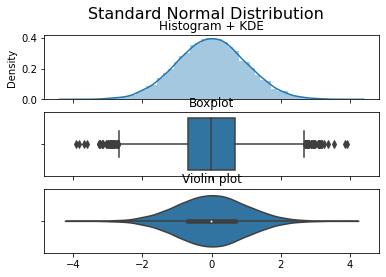

In [10]:
import seaborn as sns

N = 10 ** 4
np.random.seed(42)

def plot_comparison(x, title):
    fig, ax = plt.subplots(3, 1, sharex=True)
    sns.distplot(x, ax=ax[0])
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1])
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2])
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.show()
    
    
sample_gaussian = np.random.normal(size=N)
plot_comparison(sample_gaussian, 'Standard Normal Distribution')

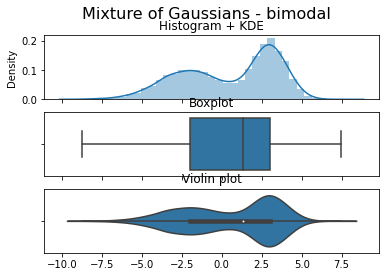

In [11]:
sample_bimodal = np.concatenate([np.random.normal(loc=-2, scale=2, size=int(N/2)),
                                 np.random.normal(loc=3, scale=1, size=int(N/2))])
plot_comparison(sample_bimodal, 'Mixture of Gaussians - bimodal')

## 2. Data Normalization: 

Data Normalization consists of transforming numeric columns to a standard scale. In machine learning, some feature values differ from others multiple times. The features with higher values will dominate the learning process. There are different normalization techniques

In [12]:
# importing packages
import pandas as pd
  
# create data
df = pd.DataFrame([
                   [120000, 670, 2400, 24.5], 
                   [250000, 863, 1500, 13.7], 
                   [280000, 187, 1900, 76.5], 
                   [30000, 390, 2900, 43.4]], 
    
                   columns=['A', 'B',
                            'C', 'D'])
  
# view data
display(df)

,A,B,C,D
0,120000,670,2400,24.5
1,250000,863,1500,13.7
2,280000,187,1900,76.5
3,30000,390,2900,43.4


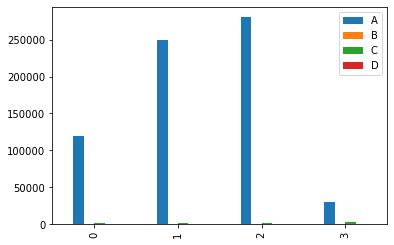

In [14]:
import matplotlib.pyplot as plt
df.plot(kind = 'bar')
plt.show()

### Using The min-max feature scaling

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

In [15]:
# copy the data
df_min_max_scaled = df.copy()
  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  
 # view normalized data
print(df_min_max_scaled)

      A         B         C         D
0  0.36  0.714497  0.642857  0.171975
1  0.88  1.000000  0.000000  0.000000
2  1.00  0.000000  0.285714  1.000000
3  0.00  0.300296  1.000000  0.472930


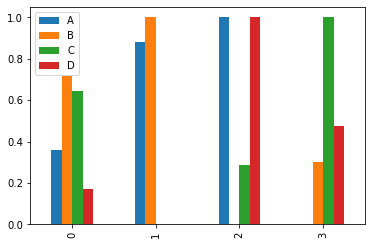

In [16]:
import matplotlib.pyplot as plt
df_min_max_scaled.plot(kind = 'bar')
plt.show()

### Using The z-score method

The z-score method (called standardization) transforms into distribution with a mean of 0 and a typical deviation of 1. Each standardized value is computed by subtracting the mean of the corresponding feature then dividing by the quality deviation.

In [17]:
# copy the data
df_z_scaled = df.copy()
  
# apply normalization techniques
for column in df_z_scaled.columns:
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()    
  
 # view normalized data   
display(df_z_scaled)

,A,B,C,D
0,-0.429801,0.477025,0.370315,-0.545631
1,0.687682,1.123100,-1.110945,-0.937831
2,0.945563,-1.139838,-0.452607,1.342742
3,-1.203443,-0.460287,1.193237,0.140720


<AxesSubplot:>

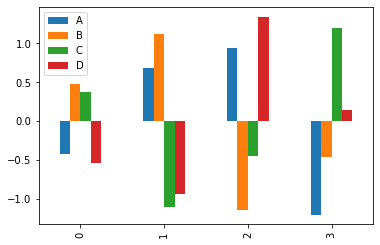

In [18]:
import matplotlib.pyplot as plt
df_z_scaled.plot(kind='bar')

## 3. Pandas

Pandas is great data processing library for table/database-like data. Excellent for things that come in or you wish to output as CSV/Excel. Part of the following content is inspired by [a Pandas tutorial online](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/).

### Creating a dataframe

Dataframe is a collection of series, where Series is a one-dimensional object

In [15]:
import pandas as pd

In [18]:
data_list = [{'a': i, 'b': i + 1} for i in range(5)]
data_list[2] = {'a': 10, 'b': 9, 'c': -1}

df = pd.DataFrame(data_list)
df

,a,b,c
0,0,1,NaN
1,1,2,NaN
2,10,9,-1.0
3,3,4,NaN
4,4,5,NaN


In [19]:
##Creating a dataframe from a 2D array
data_2d = np.array([i for i in range(50)]).reshape(5, 10)

df = pd.DataFrame(data_2d, columns=[f'col {i}' for i in range(10)], index=[f'row {i}' for i in range(5)])
df

,col 0,col 1,col 2,col 3,col 4,col 5,col 6,col 7,col 8,col 9
row 0,0,1,2,3,4,5,6,7,8,9
row 1,10,11,12,13,14,15,16,17,18,19
row 2,20,21,22,23,24,25,26,27,28,29
row 3,30,31,32,33,34,35,36,37,38,39
row 4,40,41,42,43,44,45,46,47,48,49


In [21]:
## Creating a dataframe from a Dictionary

data_dict = {'col 1': ['Maths', 'Physics', 'Chemistry', 'Biology'],
        'col 2': [35, 45, 26, 42]}

df = pd.DataFrame(data_dict)
df

,col 1,col 2
0,Maths,35
1,Physics,45
2,Chemistry,26
3,Biology,42


### Handling Missing Values

In [35]:
df = pd.DataFrame({'col 1':[1.1,2.2,3.3,4.4,5.6],
                 'col 2':[45.1,62,np.nan,np.nan,16],
                 'col 3':[31,10,25,np.nan,29],
                 'col 4':[11,24,np.nan,87,11.4],
                 'col 5':[30,26,7,51,74]})
df

,col 1,col 2,col 3,col 4,col 5
0,1.1,45.1,31.0,11.0,30
1,2.2,62.0,10.0,24.0,26
2,3.3,NaN,25.0,NaN,7
3,4.4,NaN,NaN,87.0,51
4,5.6,16.0,29.0,11.4,74


#### Identifying the missing values

In [36]:
df.isna()

,col 1,col 2,col 3,col 4,col 5
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,False,True,False
3,False,True,True,False,False
4,False,False,False,False,False


In [37]:
df.isna().any()

col 1    False
col 2     True
col 3     True
col 4     True
col 5    False
dtype: bool

In [38]:
df.isna().sum()

col 1    0
col 2    2
col 3    1
col 4    1
col 5    0
dtype: int64

# When dealing with missing values, different alternatives can be applied:

1) check the source, for example by contacting the data source to correct the missing values

2) drop missing values

3) replace the missing value with a value

4) leave the missing value as it is.

### Drop missing values

Dropping missing values can be one of the following alternatives:

1) remove rows having missing values

2) remove the whole column containing missing values We can use the dropna() by specifying the axis to be considered. If we set axis = 0 we drop the entire row, if we set axis = 1 we drop the whole column. If we apply the function df.dropna(axis=0) 3 rows of the dataset remain. If we apply the function df.dropna(axis=1), only the columns col 1 and col 5 remain. However, removed values are not applied to the original dataframe, but only to the result. We can use the argument inplace=True in order to store changes in the original dataframe df (df.dropna(axis=1,inplace=True)).

In [39]:
df.dropna(axis=1)

,col 1,col 5
0,1.1,30
1,2.2,26
2,3.3,7
3,4.4,51
4,5.6,74


In [40]:
df ## in this step again the columns are coming back.
##The change is not permanent. In order to do a permanent change we use the inplace parameter,

,col 1,col 2,col 3,col 4,col 5
0,1.1,45.1,31.0,11.0,30
1,2.2,62.0,10.0,24.0,26
2,3.3,NaN,25.0,NaN,7
3,4.4,NaN,NaN,87.0,51
4,5.6,16.0,29.0,11.4,74


In [41]:
df.dropna(axis=1, inplace = True)

In [42]:
df

,col 1,col 5
0,1.1,30
1,2.2,26
2,3.3,7
3,4.4,51
4,5.6,74


#### Replace missing values

A good strategy when dealing with missing values involves their replacement with another value. Usually, the following strategies are adopted:

1) for numerical values replace the missing value with the average value of the column

2) for categorial values replace the missing value with the most frequent value of the column

3) use other functions

In order to replace missing values, three functions can be used: fillna(), replace() and interpolate(). The fillna() function replaces all the NaN values with the value passed as argument. For example, for numerical values, all the NaN values in the numeric columns could be replaced with the average value. In order to list the type of a column, we can use the attribute dtypes as follows:

In [43]:
df = pd.DataFrame({'col 1':[1.1,2.2,3.3,4.4,5.6],
                 'col 2':[45.1,62,np.nan,np.nan,16],
                 'col 3':[31,10,25,np.nan,29],
                 'col 4':[11,24,np.nan,87,11.4],
                 'col 5':[30,26,7,51,74]})

df.fillna(df.mean()) ## use inplace parameter in order to make the changes permanant

,col 1,col 2,col 3,col 4,col 5
0,1.1,45.100000,31.00,11.00,30
1,2.2,62.000000,10.00,24.00,26
2,3.3,41.033333,25.00,33.35,7
3,4.4,41.033333,23.75,87.00,51
4,5.6,16.000000,29.00,11.40,74


In [45]:
df.fillna(method='bfill')

,col 1,col 2,col 3,col 4,col 5
0,1.1,45.1,31.0,11.0,30
1,2.2,62.0,10.0,24.0,26
2,3.3,16.0,25.0,87.0,7
3,4.4,16.0,29.0,87.0,51
4,5.6,16.0,29.0,11.4,74


In [46]:
df.fillna(method='ffill')

,col 1,col 2,col 3,col 4,col 5
0,1.1,45.1,31.0,11.0,30
1,2.2,62.0,10.0,24.0,26
2,3.3,62.0,25.0,24.0,7
3,4.4,62.0,25.0,87.0,51
4,5.6,16.0,29.0,11.4,74


## 4. Introduction to Exploratory Data Analysis

**What is Exploratory Data Analysis ?**

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

**How to perform Exploratory Data Analysis ?**

This is one such question that everyone is keen on knowing the answer. Well, the answer is it depends on the data set that you are working. There is no one method or common methods in order to perform EDA, whereas in this tutorial you can understand some common methods and plots that would be used in the EDA process.

In [ ]:
import pandas as pd

## 4.1 Reading in and Selecting from DataFrames 

Most datasets will be available in one of few formats:
* CSV file (Comma Separated Values): These files mimic an excel spreadsheet, with the different rows on each separate line and the columns separated by commas or semicolons or other symbol on the same line. `pd.read_csv` can be used to read in the file.
* JSON file (Java Script Object Notation): This format consists of object types (key value pairs) in curly braces, and arrays in square braces, and example is as follows: `{type:solvation_data, data:[{SoluteSMILES:"CCC(C)N", SolventSMILES:"CCCCCCC", "DeltaG_Solv":-3.34}, {SoluteSMILES:"CC(CO)O", SolventSMILES:"CC(CO)O", "DeltaG_Solv":-8.58}]}`. `pd.read_json` can be used to read in the file. 

from google.colab import drive 

drive.mount('/content/gdrive')

or

from google.colab import files

uploaded = files.upload()

image_path_in_colab = 'filename.jpg'

In [47]:
df = pd.read_csv("./Datasets/solvatum.csv",sep=";")

### Common Type of errors while loading csv file

1) FileNotFoundError : Check the correct path to the file

2) UnicodeDecodeError : 'utf-8' codec can't decode byte in position : invalid continuation byte. try opening the file in Sublime Text, and re-saving with encoding 'UTF-8‘.

3) pandas.parser.CParserError: Error tokenizing data, might be an issue with: the delimiters in your data. Confused by the headers/column of the file.

i) pd.read_csv('myFile.csv', skiprows=1)

ii) pandas.read_csv(fileName, sep='you_delimiter', header=None)

iii) pd.read_csv('file.csv', error_bad_lines=False)

To view the first few rows of the dataset, we can print it's head, by calling the `df.head(number_of_rows)` function.

In [21]:
df.head(10)

,Solute,Solvent,SoluteSMILES,SolventSMILES,DeltaGsolv
0,HYDROGEN SULFIDE,4-FORMYLMORPHOLINE,S,C1COCCN1C=O,-1.81
1,HYDROGEN SULFIDE,ACETIC ACID,S,CC(=O)O,-1.50
2,HYDROGEN SULFIDE,ACETONE,S,CC(=O)C,-1.90
3,HYDROGEN SULFIDE,BROMOBENZENE,S,c1ccc(cc1)Br,-1.30
4,HYDROGEN SULFIDE,CHLOROBENZENE,S,c1ccc(cc1)Cl,-1.50
5,HYDROGEN SULFIDE,DIMETHYLFORMAMIDE,S,CN(C)C=O,-2.20
6,HYDROGEN SULFIDE,ETHYLENE GLYCOL,S,C(CO)O,-0.99
7,HYDROGEN SULFIDE,N-METHYLPYRROLIDONE,S,CN1CCCC1=O,-2.25
8,HYDROGEN SULFIDE,"N,N-DIMETHYLACETAMIDE",S,CC(=O)N(C)C,-2.25
9,HYDROGEN SULFIDE,PHENYLAMINE,S,c1ccc(cc1)N,-1.70


We can extract any subset of rows or columns from the dataset.
* `df[names-of-columns]` is used for selecting columns, where we may provide a single column or an array thereof
* `df.iloc[id-of-rows]` can be used to select some rows in particular when the row-id for those rows is known

In [ ]:
df[['Solute', 'Solvent','DeltaGsolv']] 

,Solute,Solvent,DeltaGsolv
0,HYDROGEN SULFIDE,4-FORMYLMORPHOLINE,-1.81
1,HYDROGEN SULFIDE,ACETIC ACID,-1.50
2,HYDROGEN SULFIDE,ACETONE,-1.90
3,HYDROGEN SULFIDE,BROMOBENZENE,-1.30
4,HYDROGEN SULFIDE,CHLOROBENZENE,-1.50
...,...,...,...
6234,CARBON MONOXIDE,PROPYL ACETATE,0.83
6235,CARBON MONOXIDE,PYRIDINE,1.27
6236,CARBON MONOXIDE,TERT-BUTANOL,0.90
6237,CARBON MONOXIDE,TOLUENE,1.01


In [ ]:
df.iloc[10]

Solute              HYDROGEN SULFIDE
Solvent          PROPYLENE CARBONATE
SoluteSMILES                       S
SolventSMILES           CC1COC(=O)O1
DeltaGsolv                     -1.56
Name: 10, dtype: object

We can always convert a dataframe back to it's array representation, and manipulate it there. But it's idiomatic and efficient to do all dataprocessing in Pandas.

Here we convert the whole dataframe into an array, and then the first 3 rows and the last column which represents the solvation free energies of the first three molecules.

In [23]:
df.dtypes

Solute            object
Solvent           object
SoluteSMILES      object
SolventSMILES     object
DeltaGsolv       float64
dtype: object

In [24]:
df.shape #to find the number of rows and columns

(6239, 5)

In [ ]:
df.values

array([['HYDROGEN SULFIDE', '4-FORMYLMORPHOLINE', 'S', 'C1COCCN1C=O',
        -1.81],
       ['HYDROGEN SULFIDE', 'ACETIC ACID', 'S', 'CC(=O)O', -1.5],
       ['HYDROGEN SULFIDE', 'ACETONE', 'S', 'CC(=O)C', -1.9],
       ...,
       ['CARBON MONOXIDE', 'TERT-BUTANOL', '[C-]#[O+]', 'CC(C)(C)O', 0.9],
       ['CARBON MONOXIDE', 'TOLUENE', '[C-]#[O+]', 'Cc1ccccc1', 1.01],
       ['CARBON MONOXIDE', 'UNDECANE', '[C-]#[O+]', 'CCCCCCCCCCC', 1.02]],
      dtype=object)

In [ ]:
df.values[:3, -1]

array([-1.81, -1.5, -1.9], dtype=object)

**Exercise Questions:**
* Print the element in the 23rd row of the dataset
* Make a list of all the solvation free energy values as a list, and compute it's mean
* Make a dataframe with just the smiles strings of solvents and solutes and the solvation free energies, i.e. remove the common names.

## 4.2 Statistics on DataFrames

For the many numerical quantities that exist in a dataframe, we might want to compute it's mean, median, mode, quartiles, and other statistical measures. Several inbuilt functions in pandas exist for there.

The catch all for any numerical column is called describe, which for each numerical data column prints it's unique values count, mean, standard deviation, and quartiles.

This data is really useful when applied to features or outputs in estimating which features are high variance, which can be relied on significantly, etc. making this type of data analysis key in feature engineering. 

In [ ]:
df.describe()

,DeltaGsolv
count,6239.000000
mean,-3.831540
std,2.278619
min,-25.470000
25%,-4.950000
50%,-3.930000
75%,-2.730000
max,3.430000


In [25]:
df.describe(include='all')

,Solute,Solvent,SoluteSMILES,SolventSMILES,DeltaGsolv
count,6239,6239,6239,6239,6239.000000
unique,1282,146,935,146,NaN
top,CYCLOHEXANE,WATER,C1CCCCC1,O,NaN
freq,95,642,96,642,NaN
mean,NaN,NaN,NaN,NaN,-3.831540
std,NaN,NaN,NaN,NaN,2.278619
min,NaN,NaN,NaN,NaN,-25.470000
25%,NaN,NaN,NaN,NaN,-4.950000
50%,NaN,NaN,NaN,NaN,-3.930000
75%,NaN,NaN,NaN,NaN,-2.730000


In [ ]:
df.mean(numeric_only=True)

DeltaGsolv   -3.83154
dtype: float64

In [ ]:
df.median(numeric_only=True)

DeltaGsolv   -3.93
dtype: float64

In [ ]:
df["DeltaGsolv"].max()

3.43

In [ ]:
df["DeltaGsolv"].min()

-25.47

**Exercise Question:** Find the solvation free energy value which is higher than that of 80% of the molecules, and lower than 20% of them.

More discussion on this sort of analysis will follow once we learn to use plotting tools to gain more insights.

## 4.3 Sampling, Grouping and Filtering

To sample some number of rows, or fraction of all the rows from the dataframe, we can use the `df.sample` function. This is very often used for quick processing since dataframes can get too huge to gain insights from quickly, on the fly.

Since the row indices stay from the original dataframe, to make the new dataframe independent of those indices, we reset the indices and drop the old index column.

In [ ]:
sampled_df = df.sample(100)
sampled_df = sampled_df.reset_index().drop(columns=["index"])
sampled_df

,Solute,Solvent,SoluteSMILES,SolventSMILES,DeltaGsolv
0,DIMETHYL ETHER,ALLYL ALCOHOL,COC,C=CCO,-2.40
1,1-CHLOROBUTANE,DIETHYLENE GLYCOL DIBUTYL ETHER,CCCCCl,CCCCOCCOCCOCCCC,-4.07
2,HEPTANE,DICHLOROMETHANE,CCCCCCC,C(Cl)Cl,-4.46
3,"2,3-DIMETHYL-3-PENTANOL",CARBON TETRACHLORIDE,CCC(C)(C(C)C)O,C(Cl)(Cl)(Cl)Cl,-5.96
4,1-CHLOROBUTANE,"5,8,11,14-TETRAOXAOCTADECANE",CCCCCl,CCCCOCCOCCOCCOCCCC,-4.04
...,...,...,...,...,...
95,BROMOBENZENE,BROMOBENZENE,c1ccc(cc1)Br,c1ccc(cc1)Br,-6.30
96,"2,4-DIMETHYLPENTANE",N-METHYLPYRROLIDONE,CC(C)CC(C)C,CN1CCCC1=O,-2.78
97,HEXENE,N-ETHYLFORMAMIDE,CCCCC=C,CCNC=O,-2.85
98,BENZYL BROMIDE,N-BUTANOL,c1ccc(cc1)CBr,CCCCO,-6.37


In [51]:
sampled_df = df.sample(frac=0.5)
sampled_df = sampled_df.reset_index().drop(columns=["index"])
sampled_df

,Solute,Solvent,SoluteSMILES,SolventSMILES,DeltaGsolv
0,PROPIONIC ACID,DICHLOROETHANE,CCC(=O)O,C(CCl)Cl,-5.12
1,ACETONITRILE,ETHYL ACETATE,CC#N,CCOC(=O)C,-4.19
2,(2Z)-2-BUTENE,ALLYL ALCOHOL,C/C=C\C,C=CCO,-2.13
3,PROPIONALDEHYDE,TETRAHYDROFURAN,CCC=O,C1CCOC1,-3.82
4,CARBON DIOXIDE,PROPYLENE CARBONATE,C(=O)=O,CC1COC(=O)O1,-0.86
...,...,...,...,...,...
3115,HEPTANE,EPSILON-CAPROLACTONE,CCCCCCC,C1CCC(=O)OCC1,-3.20
3116,BENZENE,PENTANOL,c1ccccc1,CCCCCO,-3.86
3117,F 142B,N-METHYLPYRROLIDONE,CC(F)(F)Cl,CN1CCCC1=O,-2.13
3118,MOLECULAR OXYGEN,FLUOROBENZENE,O=O,c1ccc(cc1)F,0.56


Another key operation when analyzing data is to group the rows in a dataframe and 

`groupby` takes a list of column names, and groups all those with the same value for those column names together. Then we can perform any statistical test on these groups, computing their means, medians, modes, counts, quartiles, and the like, or we can use the describe command to do several of those.

In [ ]:
df.groupby(["Solvent","SolventSMILES"]).describe()

DeltaGsolv            \
                                                         count      mean   
Solvent                      SolventSMILES                                 
(\xb1)-1,2-PROPANEDIOL       CC(CO)O                      29.0 -2.737931   
(\xb1)-2-BUTANOL             CCC(C)O                      37.0 -2.924054   
1,4-DIOXANE                  C1COCCO1                     78.0 -3.946923   
1,5-DIMETHYL-2-PYRROLIDINONE CC1CCC(=O)N1C                22.0 -3.676818   
1-CHLOROBUTANE               CCCCCl                       45.0 -4.766000   
...                                                        ...       ...   
TRIBUTYL PHOSPHATE           CCCCOP(=O)(OCCCC)OCCCC       63.0 -3.862222   
TRIETHYLAMINE                CCN(CC)CC                    17.0 -4.463529   
UNDECANE                     CCCCCCCCCCC                  32.0 -3.754687   
UNDECANOL                    CCCCCCCCCCCO                  5.0  1.002000   
WATER                        O                           642.0 -3.803006   

                                                                              \
                                                          std    min     25%   
Solvent                      SolventSMILES                                     
(\xb1)-1,2-PROPANEDIOL       CC(CO)O                 1.887393  -8.58 -3.5000   
(\xb1)-2-BUTANOL             CCC(C)O                 2.897637 -14.09 -4.4900   
1,4-DIOXANE                  C1COCCO1                2.062037  -9.81 -5.0900   
1,5-DIMETHYL-2-PYRROLIDINONE CC1CCC(=O)N1C           0.743898  -5.05 -4.2725   
1-CHLOROBUTANE               CCCCCl                  1.800228 -13.31 -4.6800   
...                                                       ...    ...     ...   
TRIBUTYL PHOSPHATE           CCCCOP(=O)(OCCCC)OCCCC  1.743641 -10.61 -4.6800   
TRIETHYLAMINE                CCN(CC)CC               0.750999  -6.07 -4.8900   
UNDECANE                     CCCCCCCCCCC             2.650121  -8.61 -5.3800   
UNDECANOL                    CCCCCCCCCCCO            0.455379   0.49  0.5600   
WATER                        O                       3.847820 -25.47 -5.7275   

                                                                          
                                                       50%     75%   max  
Solvent                      SolventSMILES                                
(\xb1)-1,2-PROPANEDIOL       CC(CO)O                -2.760 -2.3000  2.13  
(\xb1)-2-BUTANOL             CCC(C)O                -2.410 -1.3200  1.23  
1,4-DIOXANE                  C1COCCO1               -4.330 -3.0675  1.42  
1,5-DIMETHYL-2-PYRROLIDINONE CC1CCC(=O)N1C          -3.745 -3.2375 -2.25  
1-CHLOROBUTANE               CCCCCl                 -4.370 -4.0600 -3.08  
...                                                    ...     ...   ...  
TRIBUTYL PHOSPHATE           CCCCOP(=O)(OCCCC)OCCCC -4.220 -3.3600  0.80  
TRIETHYLAMINE                CCN(CC)CC              -4.310 -3.9700 -3.28  
UNDECANE                     CCCCCCCCCCC            -3.800 -2.8350  1.12  
UNDECANOL                    CCCCCCCCCCCO            1.110  1.3900  1.46  
WATER                        O                      -3.530 -1.2150  3.43  

[146 rows x 8 columns]

Finally, we may want to filter data based on some conditions. Simply writing those conditions on in terms of the columns gives a boolean array of which rows should appear in the final filter. This can be provided to the dataframe to get those rows. Examples of this follow, first with a simple condition and then with more complex compound conditionals.

In [ ]:
filtered_df = df[df["Solvent"]=="UNDECANOL"]
filtered_df

,Solute,Solvent,SoluteSMILES,SolventSMILES,DeltaGsolv
90,MOLECULAR OXYGEN,UNDECANOL,O=O,CCCCCCCCCCCO,1.11
165,MOLECULAR NITROGEN,UNDECANOL,N#N,CCCCCCCCCCCO,1.46
230,SULFUR HEXAFLUORIDE,UNDECANOL,FS(F)(F)(F)(F)F,CCCCCCCCCCCO,0.49
5662,PERFLUOROMETHANE,UNDECANOL,C(F)(F)(F)F,CCCCCCCCCCCO,1.39
6159,METHANE,UNDECANOL,C,CCCCCCCCCCCO,0.56


In [ ]:
filtered_df = df[(df["Solvent"]=="UNDECANOL") & (df["DeltaGsolv"] < 2)]
filtered_df

,Solute,Solvent,SoluteSMILES,SolventSMILES,DeltaGsolv
90,MOLECULAR OXYGEN,UNDECANOL,O=O,CCCCCCCCCCCO,1.11
165,MOLECULAR NITROGEN,UNDECANOL,N#N,CCCCCCCCCCCO,1.46
230,SULFUR HEXAFLUORIDE,UNDECANOL,FS(F)(F)(F)(F)F,CCCCCCCCCCCO,0.49
5662,PERFLUOROMETHANE,UNDECANOL,C(F)(F)(F)F,CCCCCCCCCCCO,1.39
6159,METHANE,UNDECANOL,C,CCCCCCCCCCCO,0.56


We can also create new columns which can be computed from old columns using any custom function. These can be normal functions or lambda.

In [ ]:
def get_string_rep(x):
    return x["SoluteSMILES"] + '/' + x["SolventSMILES"]

function_applied_df = filtered_df.copy()
function_applied_df["SearchString"] = function_applied_df.apply(get_string_rep, axis=1)
function_applied_df

,Solute,Solvent,SoluteSMILES,SolventSMILES,DeltaGsolv,SearchString
90,MOLECULAR OXYGEN,UNDECANOL,O=O,CCCCCCCCCCCO,1.11,O=O/CCCCCCCCCCCO
165,MOLECULAR NITROGEN,UNDECANOL,N#N,CCCCCCCCCCCO,1.46,N#N/CCCCCCCCCCCO
230,SULFUR HEXAFLUORIDE,UNDECANOL,FS(F)(F)(F)(F)F,CCCCCCCCCCCO,0.49,FS(F)(F)(F)(F)F/CCCCCCCCCCCO
5662,PERFLUOROMETHANE,UNDECANOL,C(F)(F)(F)F,CCCCCCCCCCCO,1.39,C(F)(F)(F)F/CCCCCCCCCCCO
6159,METHANE,UNDECANOL,C,CCCCCCCCCCCO,0.56,C/CCCCCCCCCCCO


**Exercise Question:**
For each solvent, compute the mean of the solvation free energies of those molecules which have a negative free energy value and do not have a Fluorine in the molecular formula.

## 4.4 Writing back CSV files

We can write back our processed dataframes to disk to load it another time and start from there. To `to_csv` function writes back a dataframe to a CSV file.

In [ ]:
filtered_df.to_csv("filtered_solvatum.csv", sep=";", index=False)

Let's take a look at the file we just saved.

In [ ]:
with open("filtered_solvatum.csv", "r") as f:
    print("".join(f.readlines()[:5]))

Solute;Solvent;SoluteSMILES;SolventSMILES;DeltaGsolv
MOLECULAR OXYGEN;UNDECANOL;O=O;CCCCCCCCCCCO;1.11
MOLECULAR NITROGEN;UNDECANOL;N#N;CCCCCCCCCCCO;1.46
SULFUR HEXAFLUORIDE;UNDECANOL;FS(F)(F)(F)(F)F;CCCCCCCCCCCO;0.49
PERFLUOROMETHANE;UNDECANOL;C(F)(F)(F)F;CCCCCCCCCCCO;1.39



## 4.5 Making some basic plots

We can make histograms any column of our data.

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

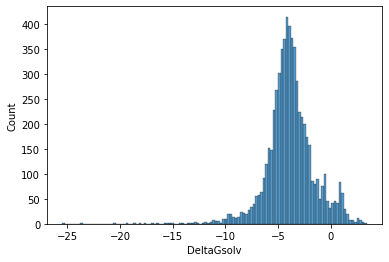

In [ ]:
sns.histplot(df["DeltaGsolv"])
plt.show()

Or we can try to plot the mean and variance of the solvation energies for every solvent and see the differences accross those.

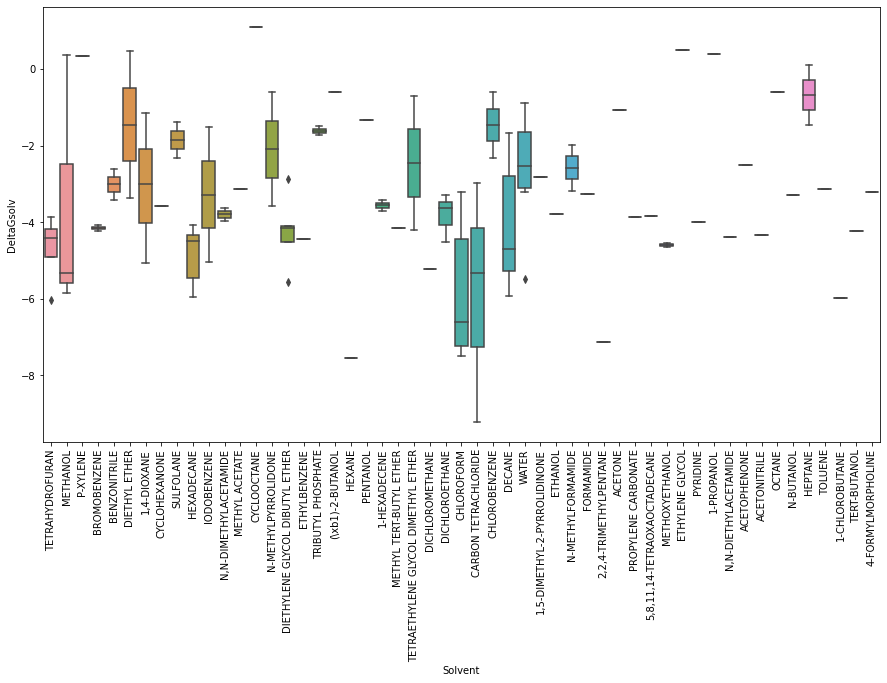

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Solvent', y='DeltaGsolv', data=df.sample(100))
plt.xticks(rotation = 90)
plt.show()

Or we can combine both and make violin plots, which are histograms made independently for each class and stacked together horizontally.

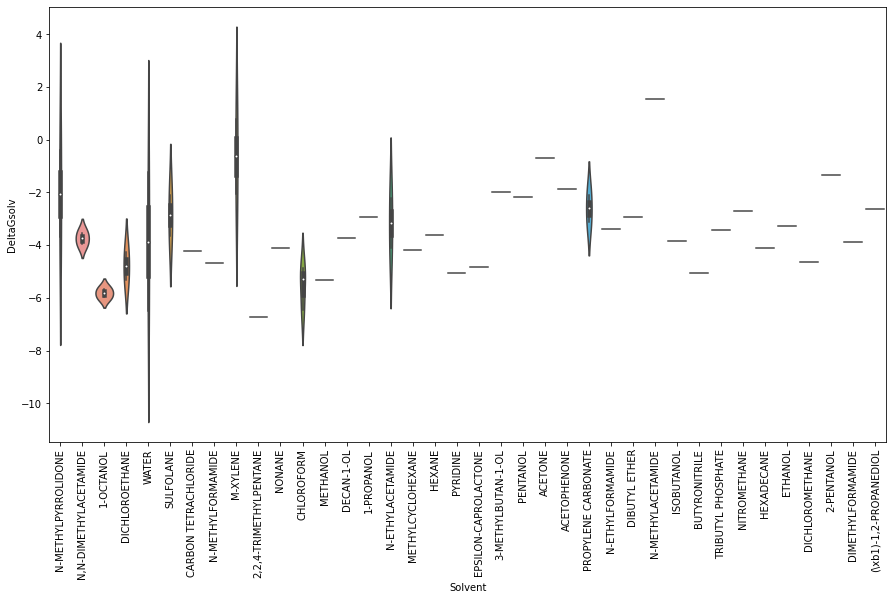

In [ ]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='Solvent', y='DeltaGsolv', data=df.sample(50))
plt.xticks(rotation = 90)
plt.show()

**Exercise Question:** Plot a histogram of the squares of the solvation free energy values.

## 4.6 Advanced Data Processing for Chemistry

Hack to setup RDKit in Colab. Not needed when running on local machines.

In [ ]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.8.3-Linux-x86_64.sh
!time bash ./Miniconda3-py37_4.8.3-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c rdkit rdkit

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-03-25 13:04:48--  https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh [following]
--2022-03-25 13:04:48--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88867207 (85M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.3-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  84.75M   123MB/s    in 0.7s    

2022-03-25 13:04:49 (123 MB/s) - ‘Minicon

In [ ]:
import rdkit.Chem
import rdkit.Chem.Draw

### Visualizing the Molecules

In [ ]:
df["Solvent"].values[:16]

array(['4-FORMYLMORPHOLINE', 'ACETIC ACID', 'ACETONE', 'BROMOBENZENE',
       'CHLOROBENZENE', 'DIMETHYLFORMAMIDE', 'ETHYLENE GLYCOL',
       'N-METHYLPYRROLIDONE', 'N,N-DIMETHYLACETAMIDE', 'PHENYLAMINE',
       'PROPYLENE CARBONATE', 'SULFOLANE',
       'TETRAETHYLENE GLYCOL DIMETHYL ETHER', 'TRIBUTYL PHOSPHATE',
       'WATER', 'ACETIC ACID'], dtype=object)

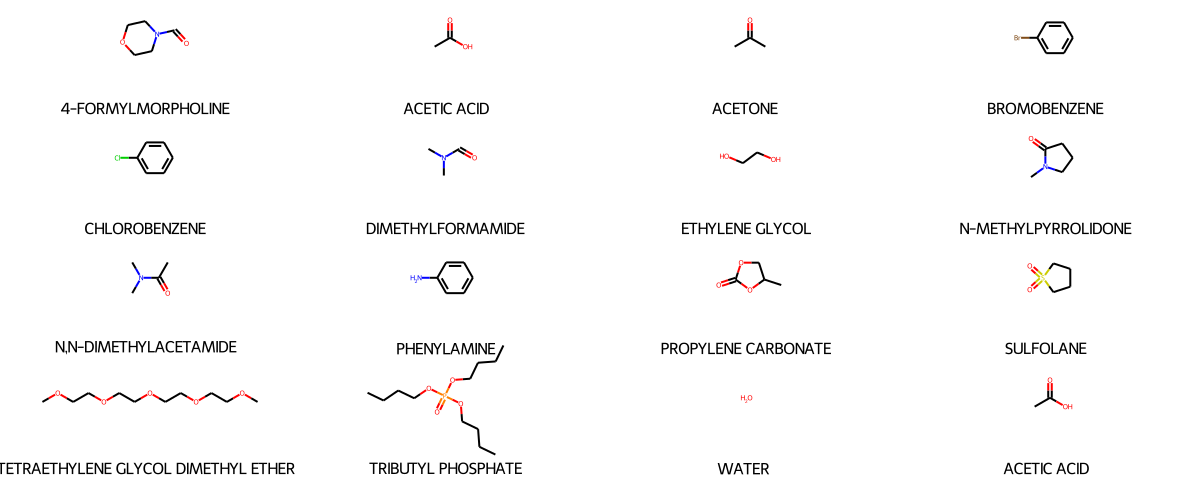

In [ ]:
molecules = [rdkit.Chem.MolFromSmiles(df["SolventSMILES"][i]) for i in range(16)]
rdkit.Chem.Draw.MolsToGridImage(molecules, molsPerRow=4, subImgSize=(300,120), legends=[df["Solvent"][i] for i in range(16)])

### Filtering based on functional groups

In [ ]:
def has_carboxyl(molecule):
    mol = rdkit.Chem.MolFromSmiles(molecule)
    functional_group = rdkit.Chem.MolFromSmarts('C=O')
    matches = mol.GetSubstructMatches(functional_group)
    return len(matches) != 0

featurized_df = df.copy()
featurized_df["soluteHasCarboxyl"] = featurized_df["SoluteSMILES"].apply(has_carboxyl)
featurized_df["solventHasCarboxyl"] = featurized_df["SolventSMILES"].apply(has_carboxyl)

In [ ]:
carboxyl_data = featurized_df.groupby(["soluteHasCarboxyl", "solventHasCarboxyl"]).mean()
carboxyl_data

DeltaGsolv
soluteHasCarboxyl solventHasCarboxyl            
False             False                -3.763243
                  True                 -3.409470
True              False                -4.701427
                  True                 -4.376910

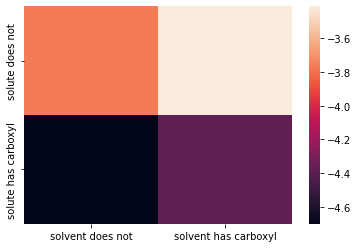

In [ ]:
sns.heatmap(
    carboxyl_data.values.reshape(2, 2), 
    yticklabels=["solute does not", "solute has carboxyl"], 
    xticklabels=["solvent does not", "solvent has carboxyl"]
)
plt.show()

**Exercise Question:** Make a 4x4 heatmap for the max value of solvation free energy when the solute and solvent each have carboxyl, alcohol, both, or neither.

## 4.7 Further Reading

* To learn about Pandas in detail, do the exercises and tutorials over at: https://www.kaggle.com/learn/pandas
* To learn about Seaborn in detail, do the exercises and tutorials over at: https://www.kaggle.com/learn/data-visualization
